In [1]:
import wptherml
from matplotlib import pyplot as plt
import numpy as np
import os
from scipy import interpolate
import glob
import colour
from colour.plotting import *

# create a tungsten incandescent object at 1700 K
tungsten_values = {
    "wavelength_list": [400e-9, 700e-9, 200],
    "Material_List": ["Air",  "W", "Air"],
    "Thickness_List": [0, 900e-9, 0],
    "temperature": 1700,
    "therml": True
}


sf = wptherml.SpectrumFactory()
w = sf.spectrum_factory('Tmm', tungsten_values)


 Your spectra have been computed! 😎 
 Your therml spectra have been computed! 🔥 


Read in the emission spectra data from the Meth_and_Propoxy_TTz folder!

In [2]:
file_location = os.path.join('Meth_and_Butoxy_TTz_sub','*.txt')
filenames = glob.glob(file_location)
print(filenames)

['Meth_and_Butoxy_TTz_sub/4.3.txt', 'Meth_and_Butoxy_TTz_sub/3.1.txt', 'Meth_and_Butoxy_TTz_sub/1.3.txt', 'Meth_and_Butoxy_TTz_sub/3.3.txt', 'Meth_and_Butoxy_TTz_sub/11.3.txt']


Now read in the emission spectra from each file, compute the CIE and RGB values for each spectrum, print
the filename and CIE values, and store the RGB values to a list.  We will use that RGB list subsequently to plot the values on the CIE color gamut.

In [3]:
cie_x = []
cie_y = []
rgb_list = []
for file in filenames:
    data = np.loadtxt(file)
    emission_spline = interpolate.interp1d(data[:,0], data[:,1])
    # make sure this spline is good!
    assert np.allclose(emission_spline(data[:,0]), data[:,1], 1e-4)
    emission_prediction = emission_spline(w.wavelength_array * 1e9)   
    cie = w.compute_cie(emission_prediction)
    cie_x.append(cie[0])
    cie_y.append(cie[1])
    rgb = w.compute_rgb(emission_prediction)
    rgb_list.append(rgb)
    print(F"{file[20:]}, {cie[0]}, {cie[1]}, {cie[2]}")

sub/4.3.txt, 0.21462838170558257, 0.24162551834020482, 0.5437460999542125
sub/3.1.txt, 0.29638444631058547, 0.3397604746235261, 0.36385507906588843
sub/1.3.txt, 0.38765294793108723, 0.4358806035232373, 0.1764664485456754
sub/3.3.txt, 0.2558098594392711, 0.2850116477785544, 0.4591784927821746
sub/11.3.txt, 0.15945045209011502, 0.16590045531755984, 0.6746490925923252


In [4]:
#plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931(rgb_list, c='black')
print(cie_x)

[0.21462838170558257, 0.29638444631058547, 0.38765294793108723, 0.25580985943927109, 0.15945045209011502]


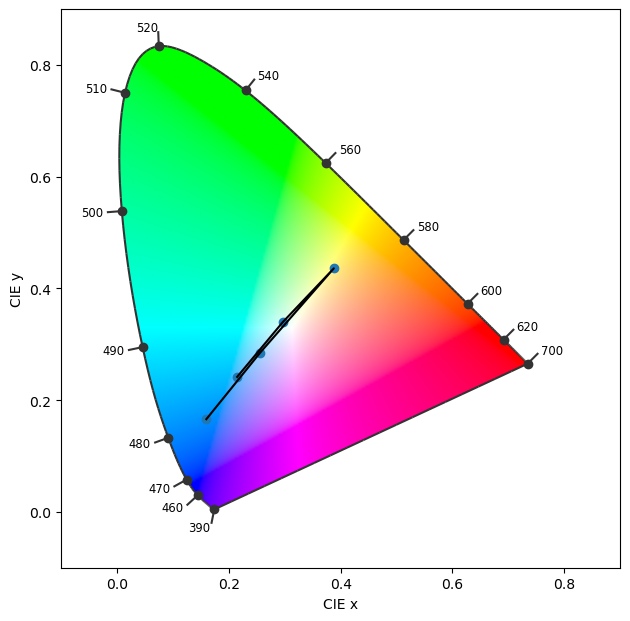

(<Figure size 640x640 with 1 Axes>,
 <AxesSubplot:xlabel='CIE x', ylabel='CIE y'>)

In [5]:
colour.plotting.plot_chromaticity_diagram_CIE1931(standalone=False)
plt.scatter(cie_x, cie_y)
plt.plot(cie_x, cie_y, 'black')
plt.title("")
colour.plotting.render(
    standalone=True,
    bounding_box = (-0.1, 0.9, -0.1, 0.9)
)